Consider the winequality-red.csv dataset (available at the webpage) where the goal is to estimate
the quality (sensory appreciation) of a wine based on physicochemical inputs.
Using a 80-20 training-test split with a fixed seed (random_state=0), you are asked to learn MLP
regressors to answer the following questions.
Given their stochastic behavior, average the performance of each MLP from 10 runs
(for reproducibility consider seeding the MLPs with random_state ∈ {1. .10}).

In [33]:
import pandas as pd

df = pd.read_csv('data/winequality-red.csv', sep=';')
X, y = df.drop('quality', axis=1), df['quality']

1) [3.5v] Learn a MLP regressor with 2 hidden layers of size 10, rectifier linear unit activation
on all nodes, and early stopping with 20% of training data set aside for validation. All
remaining parameters (e.g., loss, batch size, regularization term, solver) should be set as
default. Plot the distribution of the residues (in absolute value) using a histogram.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Not converging with the 200 default iterations (had to make it bigger)
regressors = [MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=k, max_iter=500) for k in range(1, 11)]

for r in regressors:
    r.fit(X_train, y_train)

y_test_pred = [r.predict(X_test) for r in regressors]
y_test_pred = list(zip(y_test_pred[0], y_test_pred[1], y_test_pred[2], y_test_pred[3], y_test_pred[4], y_test_pred[5], y_test_pred[6], y_test_pred[7], y_test_pred[8], y_test_pred[9]))

y_test_pred = [sum(k)/len(k) for k in y_test_pred]

residues = np.abs(np.array(y_test_pred)-np.array(y_test))

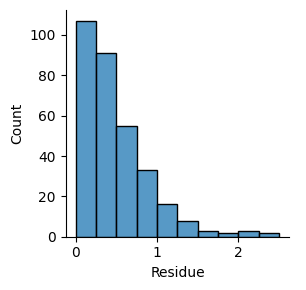

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = pd.DataFrame(residues, columns=["Residue"])
plot=sns.FacetGrid(plot_df)
plot.map(sns.histplot, "Residue", binwidth=0.25).add_legend()
plt.show()

2) [1.5v] Since we are in the presence of a integer regression task, a recommended trick is to
round and bound estimates. Assess the impact of these operations on the MAE of the MLP
learnt in previous question.

In [35]:
from sklearn.metrics import mean_absolute_error

def round_and_bound(x):
    if x <= 0:
        return 0
    if x >= 10:
        return 10
    
    return np.round(x)

y_test_pred_round = [round_and_bound(y) for y in y_test_pred]

original_mae = mean_absolute_error(y_test, y_test_pred)
new_mae = mean_absolute_error(y_test, y_test_pred_round)

(original_mae, new_mae) # Ask teacher if needs comment

(0.4873681321254506, 0.4125)